AIM:
To perform image classification using a customized Convolutional Neural Network (CNN) on the CIFAR-10 dataset.


OBJECTIVES:
 - Load and explore the CIFAR-10 dataset.
 - Preprocess and normalize image data.
 - Design a custom CNN architecture.
 - Train and validate the model.
 - Evaluate the model performance on the test set.
 - Export the trained model for deployment.

THEORY:

CIFAR-10 Dataset:
- Contains 60,000 32x32 color images in 10 classes with 6,000 images per class.
- 50,000 training images and 10,000 testing images.

Convolutional Neural Networks (CNNs):
- Specialized neural networks for processing image data.
- Includes Conv2D, Pooling, Flatten, Dense layers.

Activation Functions:
- ReLU: introduces non-linearity.
- Softmax: used in the output layer for multi-class classification.

Optimizer:
 - Adam optimizer is used for faster convergence and efficiency.

Evaluation Metrics:
- Accuracy and Loss are key performance metrics.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

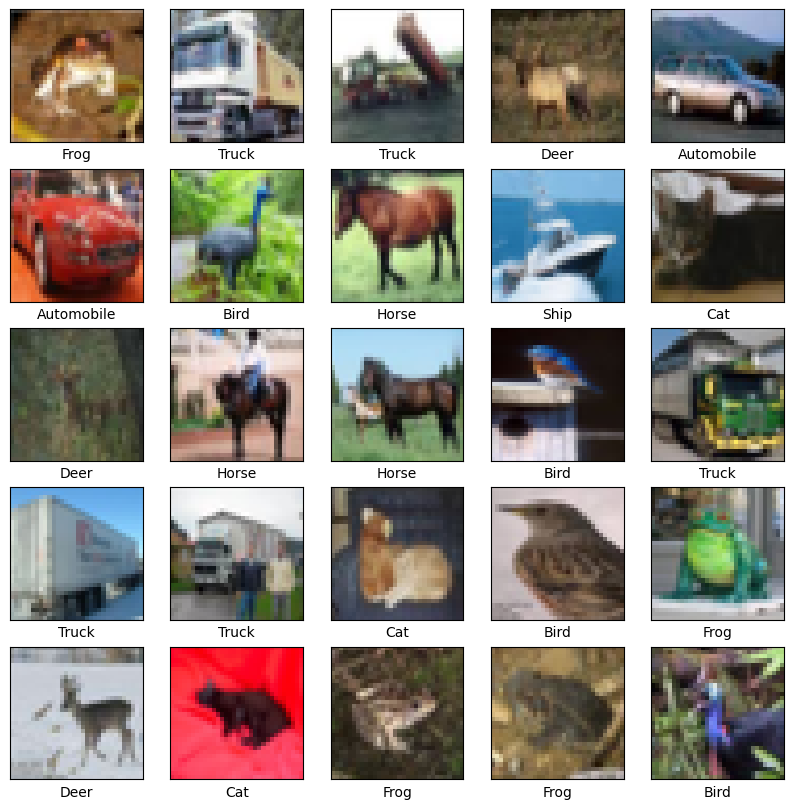

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.3286 - loss: 1.8152 - val_accuracy: 0.4873 - val_loss: 1.4089
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.5420 - loss: 1.2820 - val_accuracy: 0.5533 - val_loss: 1.2286
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.6123 - loss: 1.1014 - val_accuracy: 0.6268 - val_loss: 1.0482
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.6554 - loss: 0.9822 - val_accuracy: 0.6415 - val_loss: 1.0246
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.6870 - loss: 0.9036 - val_accuracy: 0.6632 - val_loss: 0.9518
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.7102 - loss: 0.8340 - val_accuracy: 0.6904 - val_loss: 0.8745
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.7302 - loss: 0.7727 - val_accuracy: 0.6895 - val_loss: 0.8916
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 73ms/step - accuracy: 0.7386 - loss: 0.7440 - 

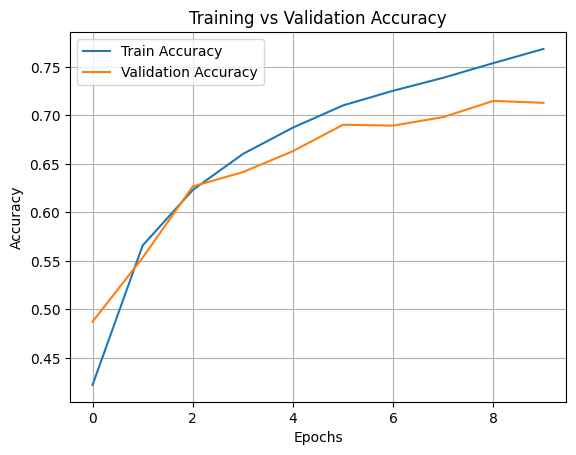

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 - 3s - 10ms/step - accuracy: 0.7130 - loss: 0.8562

Test Accuracy: 71.30%


In [ ]:
model.save("cifar10_custom_cnn_model.h5")

CONCLUSION:

The customized CNN successfully classified images from the CIFAR-10 dataset.
The final test accuracy achieved was approximately 71.30%.
The model can be further improved with more epochs, data augmentation, or deeper architectures.
This experiment demonstrates an end-to-end deep learning pipeline from data preparation to model deployment.